<a href="https://colab.research.google.com/github/smalvar/CalculadoraAluguel-Novembro/blob/main/2.%20Limpeza%20de%20dados%20e%20EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

In [20]:
dados = pd.read_csv('banco_final.csv')

In [21]:
dados = dados.drop(['Unnamed: 0','endereco','rua','bairro'],axis=1)
dados.head()

,aluguel,quartos,banheiro,vaga,area,zona
0,3400,2.0,2.0,1.0,130,Oeste
1,3400,2.0,2.0,2.0,88,Oeste
2,5400,2.0,2.0,1.0,72,Oeste
3,2600,2.0,2.0,1.0,91,Oeste
4,3800,1.0,1.0,1.0,44,Oeste


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(dados, test_size=0.25, random_state=1, stratify=dados['zona'])

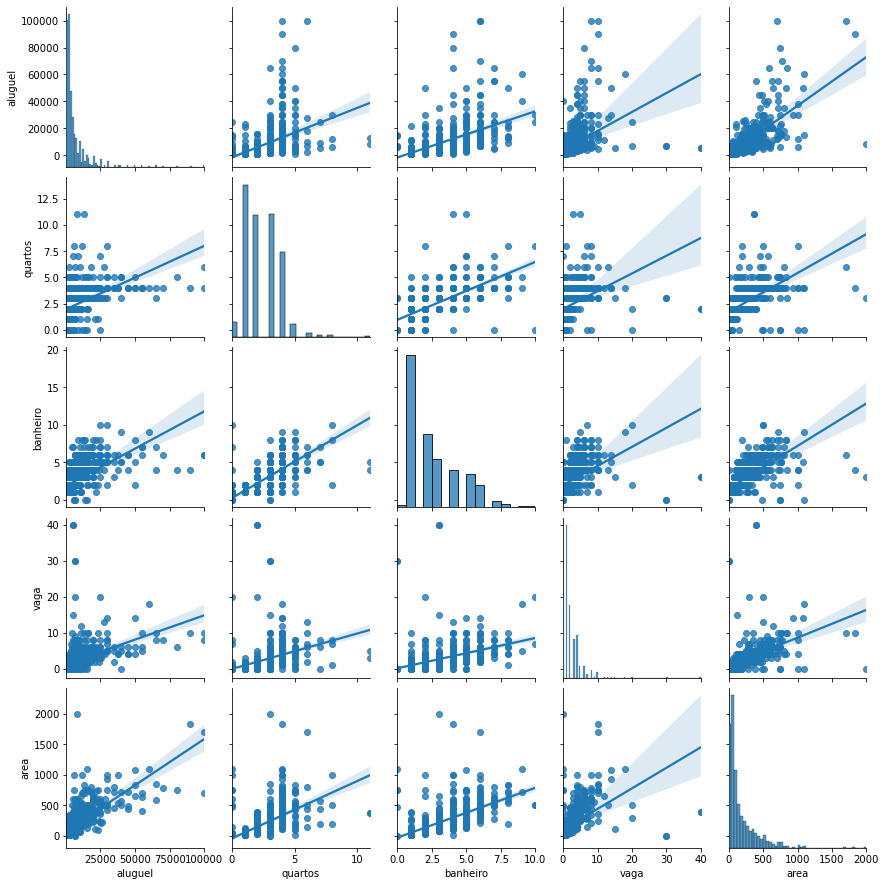

In [26]:
import seaborn as sns
sns.pairplot(train, kind='reg')

In [27]:
import numpy as np
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

<ipython-input-27-142e0a19dbb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['aluguel']=train['aluguel'].apply(np.log1p)
<ipython-input-27-142e0a19dbb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['area']=train['area'].apply(np.log1p)
<ipython-input-27-142e0a19dbb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

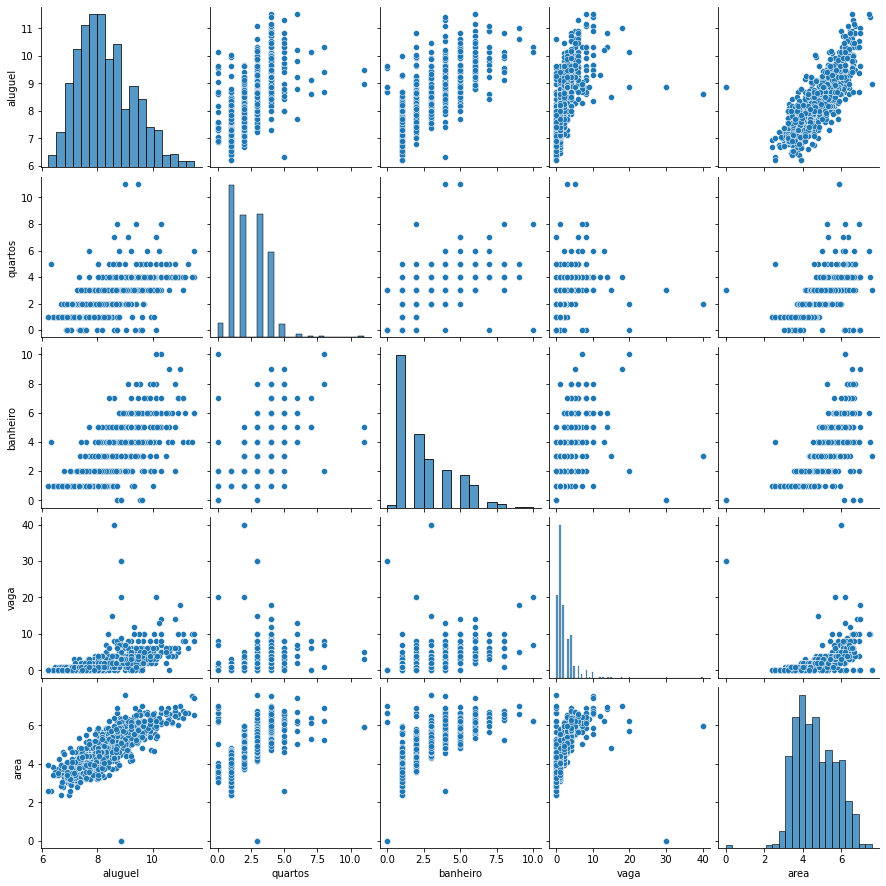

In [28]:
sns.pairplot(train)

In [29]:
X_cols=['zona', 'area', 'quartos','banheiro','vaga']
y_col=['aluguel']

In [30]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
X_train.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul,zona_nenhuma
918,3.433987,0.0,1.0,0.0,1,0,0,0,0,0
763,3.332205,1.0,1.0,1.0,0,1,0,0,0,0
5,4.110874,2.0,2.0,1.0,0,0,0,1,0,0
486,6.175867,0.0,0.0,0.0,0,0,0,0,1,0
264,4.394449,2.0,2.0,2.0,0,0,0,0,1,0


In [33]:
y_train.head()

,aluguel
918,6.908755
763,7.531016
5,7.989899
486,8.699681
264,7.496097


In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
y_pred = neigh.predict(X_test)

In [37]:
# Mean Squared Errorfrom
np.mean((y_pred-y_test.values)**2)

0.35081618269289155

In [38]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.45286319093279165

In [39]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7164533182024415

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.7743760866060069

In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

regressor_list = [ KNeighborsRegressor(),
                  LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  XGBRegressor(),
                  MLPRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=5)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando KNeighborsRegressor
Train score 0.7992470639731397
Validation score [0.67106204 0.66786094 0.73746722 0.66782716 0.7253563 ]
Test score 0.7164533182024415
Treinando LinearRegression
Train score 0.740431049422524
Validation score [0.70339717 0.7497047  0.72333037 0.69901785 0.76173154]
Test score 0.7743760866060069
Treinando DecisionTreeRegressor
Train score 0.9790831049340344
Validation score [0.4166902  0.52600651 0.59882258 0.61352164 0.50231772]
Test score 0.6070271190435694
Treinando RandomForestRegressor
Train score 0.9494656355702129
Validation score [0.65597711 0.72863443 0.7931104  0.7310599  0.75321439]
Test score 0.7662495625767705
Treinando XGBRegressor
Train score 0.9676503642812968
Validation score [0.62632361 0.68537631 0.76984589 0.66202629 0.68401874]
Test score 0.7689710326539345
Treinando MLPRegressor
Train score 0.7550020310102549
Validation score [0.71211706 0.7412749  0.71573259 0.7288692  0.7564731 ]
Test score 0.7628823756503518


### Testando com o XGBoost

In [44]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [46]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [47]:
reg = gs.best_estimator_

In [48]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8070962658417556
Validation score [0.73764375 0.74147273 0.77587865]
Test score 0.7816920346111881


In [49]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

### Testando todos os processos

In [50]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [51]:
for reg in all_regs:
  try:
    print('Treinando', reg.__class__.__name__)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    val_score = cross_val_score(reg, X_train, y_train, cv=3)
    test_score = reg.score(X_test, y_test)
    print('Train score', train_score)
    print('Validation score', val_score)
    print('Test score', test_score)
    print('='*80)
  except Exception as e:
    print(e)

Treinando ARDRegression
Train score 0.7399258207348653
Validation score [0.72826862 0.65821941 0.74916629]
Test score 0.7742353851506389
Treinando AdaBoostRegressor
Train score 0.7730149401151238
Validation score [0.70304348 0.72614242 0.76171173]
Test score 0.7706104622915836
Treinando BaggingRegressor
Train score 0.9412964769436737
Validation score [0.67832605 0.71403874 0.72645641]
Test score 0.7617971994697706
Treinando BayesianRidge
Train score 0.7403604116287316
Validation score [0.73150009 0.6592593  0.75004202]
Test score 0.774743565933675
Treinando CCA
Train score 4.118927421359331e-14
Validation score [-0.0021389  -0.01376051 -0.0044396 ]
Test score -0.0023804596461354244
Treinando DecisionTreeRegressor
Train score 0.9790831049340344
Validation score [0.44748591 0.58753873 0.565001  ]
Test score 0.6235861127252099
Treinando DummyRegressor
Train score 0.0
Validation score [-0.0021389  -0.01376051 -0.0044396 ]
Test score -0.0023804596461769467
Treinando ElasticNet
Train score 0

Unable to coerce to Series, length must be 1: given 844
Treinando RANSACRegressor
Train score 0.7171753807841335
Validation score [0.68517537 0.69873041 0.71963428]
Test score 0.7637725685089387
Treinando RadiusNeighborsRegressor
Input contains NaN, infinity or a value too large for dtype('float64').
Treinando RandomForestRegressor
Train score 0.9500192478852605
Validation score [0.69476678 0.72959194 0.74580171]
Test score 0.7648992609926015
Treinando Ridge
Train score 0.7404258644813054
Validation score [0.73016426 0.65879453 0.74972378]
Test score 0.7744519563002019
Treinando RidgeCV
Train score 0.740074761488211
Validation score [0.73371192 0.65904915 0.74980022]
Test score 0.7751758699638674
Treinando SGDRegressor
Train score 0.6131312711721446
Validation score [0.16153789 0.35656375 0.54663606]
Test score 0.7144683512057151
Treinando SVR
Train score 0.7785409235467393
Validation score [0.74454773 0.756456   0.76641478]
Test score 0.7631820302810549
Treinando TheilSenRegressor
Tra